In [56]:
# install.packages(c("ggplot2", "dplyr","car"))

In [57]:
library(ggplot2)
library(dplyr)
library(car)
library(reshape2)

# Part 1 - Data analysis

## 1. Load data

In [58]:
data <- read.csv("housing_data.csv")
head(data, 5)

,Crime.Rate,Average.Rooms,Public.Transport.Access,Number.of.Schools,Median.Home.Value
,<dbl>,<dbl>,<int>,<int>,<dbl>
1,NA,5.585324,10,3,47.90077
2,2.654339,5.395206,3,6,41.53910
3,4.619221,6.033965,9,4,48.51757
4,6.807575,5.418335,10,5,42.50757
5,2.414617,6.189320,2,4,51.39125


## 2. Summary statistics


In [59]:
# cat("Structur of data:\n\n")
# str(data)
# cat("\n-------------------------------------------------\n")
cat("Summary: ")
summary(data)

Summary: 

   Crime.Rate        Average.Rooms   Public.Transport.Access Number.of.Schools
 Min.   : 0.005305   Min.   :4.112   Min.   : 1.000          Min.   : 0.000   
 1st Qu.: 1.299938   1st Qu.:5.598   1st Qu.: 3.000          1st Qu.: 4.000   
 Median : 3.031481   Median :6.033   Median : 5.000          Median : 5.000   
 Mean   : 3.137415   Mean   :6.026   Mean   : 5.421          Mean   : 4.992   
 3rd Qu.: 4.584798   3rd Qu.:6.460   3rd Qu.: 8.000          3rd Qu.: 6.000   
 Max.   :12.631829   Max.   :7.801   Max.   :10.000          Max.   :10.000   
 NA's   :25          NA's   :15                                               
 Median.Home.Value
 Min.   :31.55    
 1st Qu.:43.23    
 Median :46.91    
 Mean   :47.10    
 3rd Qu.:50.85    
 Max.   :62.56    
                  

In [60]:
tail(data[, 1])

[1] 5.315444       NA 0.100000 4.407423 1.373394 1.782187

## 3. Get mean, mode and median, as well as the standard deviation for each variable

**Mean**

In [61]:
means <- function(df, column) {
    mean_value <- mean(df[[column]], na.rm = TRUE)
    return(mean_value)
}

for (col in colnames(data)) {
    cat(paste("Mean of", col, ":", means(data, col), "\n"))
}


Mean of Crime.Rate : 3.13741457390437 
Mean of Average.Rooms : 6.02573705745418 
Mean of Public.Transport.Access : 5.42094861660079 
Mean of Number.of.Schools : 4.99209486166008 
Mean of Median.Home.Value : 47.1035584244862 


**Mode**


In [62]:
mode <- function(df, column) {
    unique <- unique(df[[column]])
    mode_value <- unique[which.max(tabulate(match(df[[column]], unique)))]
    return(mode_value)
}

for (col in colnames(data)) {
    cat(paste("Mode of", col, ":", mode(data, col), "\n"))
}

Mode of Crime.Rate : 0.1 
Mode of Average.Rooms : NA 
Mode of Public.Transport.Access : 2 
Mode of Number.of.Schools : 5 
Mode of Median.Home.Value : 47.90076602 


**Median**

In [63]:
median_value <- function(df, column) {
  med <- median(df[[column]], na.rm = TRUE)
  return(med)
}

for (col in colnames(data)) {
  cat(paste("Median of", col, ":", median_value(data, col), "\n"))
}

Median of Crime.Rate : 3.031481002 
Median of Average.Rooms : 6.03317907 
Median of Public.Transport.Access : 5 
Median of Number.of.Schools : 5 
Median of Median.Home.Value : 46.91257421 


### 4. Compute the correlation between each pair of variables


In [64]:
corr_matrix <- cor(data, use = "pairwise.complete.obs")
corr_matrix

,Crime.Rate,Average.Rooms,Public.Transport.Access,Number.of.Schools,Median.Home.Value
Crime.Rate,1.00000000,0.109411375,0.0115047832,0.025079768,0.0879369585
Average.Rooms,0.10941138,1.000000000,-0.0074220520,-0.008113311,0.8896695239
Public.Transport.Access,0.01150478,-0.007422052,1.0000000000,0.014596282,0.0009097478
Number.of.Schools,0.02507977,-0.008113311,0.0145962817,1.000000000,-0.0072444918
Median.Home.Value,0.08793696,0.889669524,0.0009097478,-0.007244492,1.0000000000


In [65]:
high_corr <- which(corr_matrix == max(corr_matrix[corr_matrix < 1]), arr.ind=TRUE)
print(high_corr)
cat(paste("The highest correlation is between columns: ",colnames(corr_matrix)[high_corr][1]," and ",colnames(corr_matrix)[high_corr][2]))


                  row col
Median.Home.Value   5   2
Average.Rooms       2   5
The highest correlation is between columns:  Median.Home.Value  and  Average.Rooms

In [66]:
cat("Na values: \n")
cat(paste("\nCrime.Rate:", colSums(is.na(data["Crime.Rate"]))))
cat(paste("\nAverage.Rooms:", colSums(is.na(data["Average.Rooms"]))))
cat(paste("\nPublic.Transport.Access:", colSums(is.na(data["Public.Transport.Access"]))))
cat(paste("\nNumber.of.Schools:", colSums(is.na(data["Number.of.Schools"]))))
cat(paste("\nMedian.Home.Value:", colSums(is.na(data["Median.Home.Value"]))))

# colSums(is.na(data))


Na values: 

Crime.Rate: 25
Average.Rooms: 15
Public.Transport.Access: 0
Number.of.Schools: 0
Median.Home.Value: 0

In [67]:
data_cleaned <- data %>% mutate_all(~ifelse(is.na(.), median(., na.rm = TRUE), .))
data_cleaned

Crime.Rate,Average.Rooms,Public.Transport.Access,Number.of.Schools,Median.Home.Value
<dbl>,<dbl>,<int>,<int>,<dbl>
3.0314810,5.585324,10,3,47.90077
2.6543392,5.395206,3,6,41.53910
4.6192213,6.033965,9,4,48.51757
6.8075746,5.418335,10,5,42.50757
2.4146166,6.189320,2,4,51.39125
2.4146576,5.964833,6,4,49.64657
6.9480320,5.832736,7,4,48.76959
4.9185868,5.364705,9,4,38.21798
1.8263140,5.596260,3,6,44.69063


In [68]:
cat("Na values after filling missing values: \n")
cat(paste("\nCrime.Rate:", colSums(is.na(data_cleaned["Crime.Rate"]))))
cat(paste("\nAverage.Rooms:", colSums(is.na(data_cleaned["Average.Rooms"]))))
cat(paste("\nPublic.Transport.Access:", colSums(is.na(data_cleaned["Public.Transport.Access"]))))
cat(paste("\nNumber.of.Schools:", colSums(is.na(data_cleaned["Number.of.Schools"]))))
cat(paste("\nMedian.Home.Value:", colSums(is.na(data_cleaned["Median.Home.Value"]))))


Na values after filling missing values: 

Crime.Rate: 0
Average.Rooms: 0
Public.Transport.Access: 0
Number.of.Schools: 0
Median.Home.Value: 0

# Part 2 - Data visualization
## Create a histogram of house prices with styling and 8 bins

Warning message in geom_histogram(bins = 9, Fill = "darkcyan", Color = "white", :
"Ignoring unknown parameters: `Fill`, `Color`, and `Alpha`"


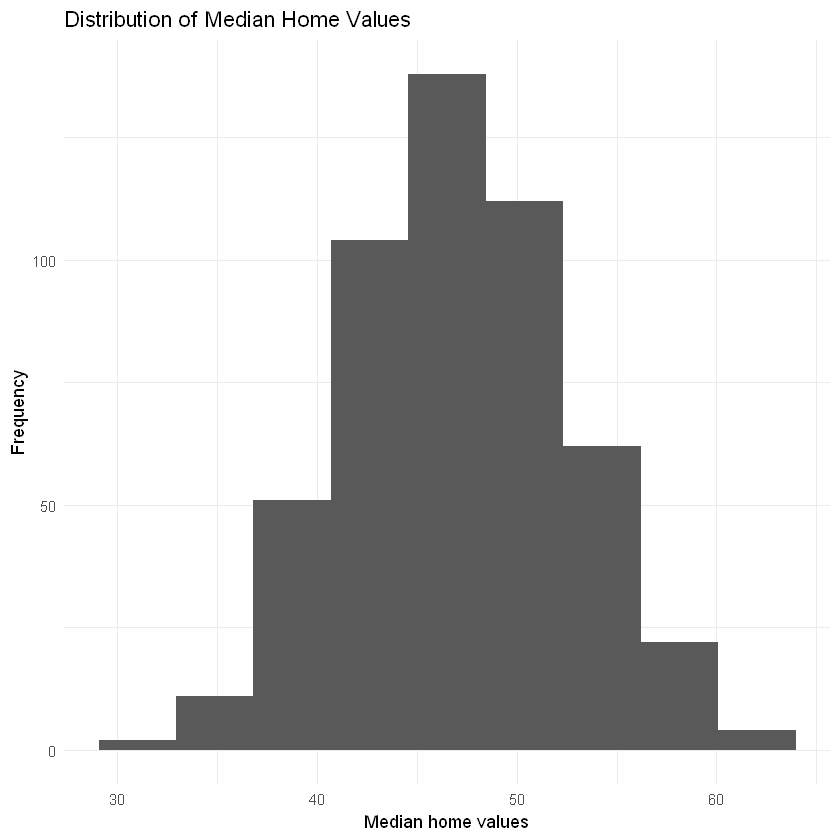

In [69]:
ggplot(data_cleaned, aes(x = Median.Home.Value)) +
    geom_histogram(bins= 9, Fill = "darkcyan",Color = "white",Alpha = 0.7  ) +
    labs(title = "Distribution of Median Home Values", x= "Median home values", y= "Frequency") +
    theme_minimal()


# Part 3 - Hypothesis testing
## 1. Define "high" and "low" crime rates based on the median of the Crime.Rate variable


In [70]:
high_low_crimerate <- function(x){
    median_crimerate <- median(data_cleaned$Crime.Rate)
    if (x > median_crimerate){
        return("High")
    }
    else {
       return("Low")
    }
}

In [71]:
data_cleaned$Crime.Category <- sapply(data_cleaned$Crime.Rate, high_low_crimerate)
data_cleaned

Crime.Rate,Average.Rooms,Public.Transport.Access,Number.of.Schools,Median.Home.Value,Crime.Category
<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>
3.0314810,5.585324,10,3,47.90077,Low
2.6543392,5.395206,3,6,41.53910,Low
4.6192213,6.033965,9,4,48.51757,High
6.8075746,5.418335,10,5,42.50757,High
2.4146166,6.189320,2,4,51.39125,Low
2.4146576,5.964833,6,4,49.64657,Low
6.9480320,5.832736,7,4,48.76959,High
4.9185868,5.364705,9,4,38.21798,High
1.8263140,5.596260,3,6,44.69063,Low


## 2. Check for assumptions

We will now determine if there's a statistically significant difference in the median home values of areas with high crime rates compared to areas with low crime rates.
- **Null Hypothesis (H0​):** The median home values are the same for areas with high and low crime rates.
- **Alternative Hypothesis (H1​):** The median home values differ for areas with high crime rates compared to areas with low crime rates.

In [72]:
levene_test <- leveneTest(Median.Home.Value ~ Crime.Category, data = data_cleaned)
print(levene_test)
cat("\n------------------------------------------\n")
t_test_result <- t.test(Median.Home.Value ~ Crime.Category, data = data_cleaned, var.equal = TRUE)
t_test_result

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


Levene's Test for Homogeneity of Variance (center = median)
       Df F value Pr(>F)
group   1  1.9312 0.1652
      504               

------------------------------------------



	Two Sample t-test

data:  Median.Home.Value by Crime.Category
t = 1.2257, df = 504, p-value = 0.2209
alternative hypothesis: true difference in means between group High and group Low is not equal to 0
95 percent confidence interval:
 -0.3609864  1.5583767
sample estimates:
mean in group High  mean in group Low 
          47.41829           46.81959 


P-Value is 0.2209, which is greater than 0.05 so we **fail to reject** the null hypothesis and conclude that there is no significant difference

# Part 4 - Linear regression
## for predicting the median home value with the average rooms variable

In [76]:
head(data_cleaned)

,Crime.Rate,Average.Rooms,Public.Transport.Access,Number.of.Schools,Median.Home.Value,Crime.Category
,<dbl>,<dbl>,<int>,<int>,<dbl>,<chr>
1,3.031481,5.585324,10,3,47.90077,Low
2,2.654339,5.395206,3,6,41.53910,Low
3,4.619221,6.033965,9,4,48.51757,High
4,6.807575,5.418335,10,5,42.50757,High
5,2.414617,6.189320,2,4,51.39125,Low
6,2.414658,5.964833,6,4,49.64657,Low


`geom_smooth()` using formula = 'y ~ x'


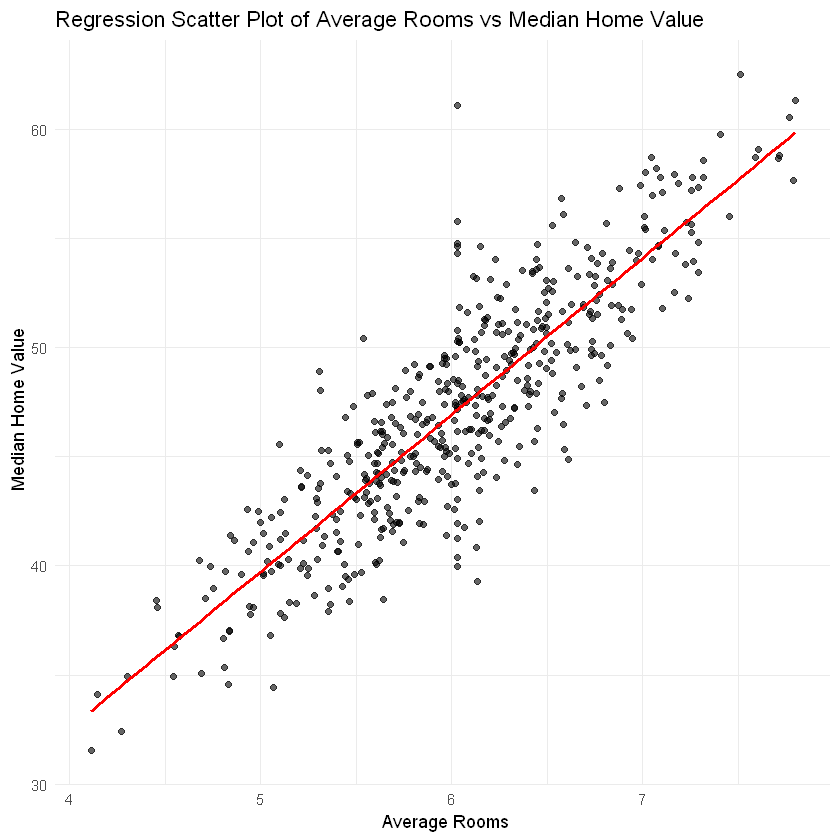

In [77]:
ggplot(data_cleaned, aes(x = Average.Rooms, y = Median.Home.Value )) +
    geom_point(alpha=0.6) +
    geom_smooth(method="lm", col="red", se=FALSE) +
    labs(title = "Regression Scatter Plot of Average Rooms vs Median Home Value", x= " Average Rooms", y= " Median Home Value") +
    theme_minimal()


In [78]:
model <- lm(Median.Home.Value ~ Average.Rooms, data = data_cleaned)
summary(model)


Call:
lm(formula = Median.Home.Value ~ Average.Rooms, data = data_cleaned)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.6212 -1.6873  0.0096  1.7347 13.9495 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)     3.7854     1.0944   3.459 0.000588 ***
Average.Rooms   7.1886     0.1805  39.823  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.698 on 504 degrees of freedom
Multiple R-squared:  0.7588,	Adjusted R-squared:  0.7584 
F-statistic:  1586 on 1 and 504 DF,  p-value: < 2.2e-16


In [81]:
summary(model)$r.squared

[1] 0.7588324

In [85]:
summary(model)$coefficients[, 4]

(Intercept) Average.Rooms 
 5.882472e-04 9.005961e-158

In [90]:
tail(data_cleaned[, 1])

[1] 5.315444 3.031481 0.100000 4.407423 1.373394 1.782187